# Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from scipy.stats import pointbiserialr

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Gather and Clean Data

In [2]:
data_dekho = pd.read_csv("../input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv")
data_dekho.shape

(4340, 8)

In [3]:
data_dekho.tail() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [4]:
data_dekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


* As you can see abowe, we have 8 columns. 
* We are lucky, we have no null or NaN values in our dataset. 
* We can start to analyze our dataset with the feature that is called <b>name</b>. 

In [5]:
data_dekho["name"]

0                             Maruti 800 AC
1                  Maruti Wagon R LXI Minor
2                      Hyundai Verna 1.6 SX
3                    Datsun RediGO T Option
4                     Honda Amaze VX i-DTEC
                       ...                 
4335    Hyundai i20 Magna 1.4 CRDi (Diesel)
4336             Hyundai i20 Magna 1.4 CRDi
4337                    Maruti 800 AC BSIII
4338       Hyundai Creta 1.6 CRDi SX Option
4339                       Renault KWID RXT
Name: name, Length: 4340, dtype: object

* You can see different names for cars in the dataset. 
* But I don't want to use this feature. Because what I wanna do is that just predicting prices, but this shouldn't include their name. If I did this, I would have to be divide them. But I don't want.  

In [6]:
data_dekho.drop(['name'], axis=1, inplace=True)
data_dekho.head() 

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


* Analyze transmission 
* Manual = 0, Automatic = 1 

In [7]:
data_dekho['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [8]:
transmission = data_dekho['transmission'] 
transmission_clean = [0 if i == "Manual"  else 1  for i in data_dekho['transmission']]

transmission_clean = np.array(transmission_clean)
transmission_clean.shape

(4340,)

In [9]:
data_dekho.drop(['transmission'], axis=1, inplace=True)
data_dekho['transmission'] = transmission_clean

* Analyze owner

In [10]:
data_dekho['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [11]:
owner_unique_names = data_dekho['owner'].unique()
owner_unique_names = pd.Series(index=owner_unique_names, data=[0,1,2,3,4])
dict(owner_unique_names)

{'First Owner': 0,
 'Second Owner': 1,
 'Fourth & Above Owner': 2,
 'Third Owner': 3,
 'Test Drive Car': 4}

In [12]:
data_dekho['owner'].replace(dict(owner_unique_names), inplace=True)
data_dekho.head() 

,year,selling_price,km_driven,fuel,seller_type,owner,transmission
0,2007,60000,70000,Petrol,Individual,0,0
1,2007,135000,50000,Petrol,Individual,0,0
2,2012,600000,100000,Diesel,Individual,0,0
3,2017,250000,46000,Petrol,Individual,0,0
4,2014,450000,141000,Diesel,Individual,1,0


In [13]:
fuel_unique_names = data_dekho['fuel'].unique()
fuel_unique_names = pd.Series(index=fuel_unique_names, data=[0,1,2,3,4])
dict(fuel_unique_names)
data_dekho['fuel'].replace(dict(fuel_unique_names), inplace=True)
data_dekho.head() 

,year,selling_price,km_driven,fuel,seller_type,owner,transmission
0,2007,60000,70000,0,Individual,0,0
1,2007,135000,50000,0,Individual,0,0
2,2012,600000,100000,1,Individual,0,0
3,2017,250000,46000,0,Individual,0,0
4,2014,450000,141000,1,Individual,1,0


In [14]:
seller_type_unique_names = data_dekho['seller_type'].unique()
seller_type_unique_names = pd.Series(index=seller_type_unique_names, data=[0,1,2])
dict(seller_type_unique_names)
data_dekho['seller_type'].replace(dict(seller_type_unique_names), inplace=True)
data_dekho.head() 

,year,selling_price,km_driven,fuel,seller_type,owner,transmission
0,2007,60000,70000,0,0,0,0
1,2007,135000,50000,0,0,0,0
2,2012,600000,100000,1,0,0,0
3,2017,250000,46000,0,0,0,0
4,2014,450000,141000,1,0,1,0


In [15]:
data = data_dekho.drop('selling_price', axis=1) 
data['price'] = data_dekho['selling_price'] 

In [16]:
data.head() 

,year,km_driven,fuel,seller_type,owner,transmission,price
0,2007,70000,0,0,0,0,60000
1,2007,50000,0,0,0,0,135000
2,2012,100000,1,0,0,0,600000
3,2017,46000,0,0,0,0,250000
4,2014,141000,1,0,1,0,450000


In [17]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   year          4340 non-null   int64
 1   km_driven     4340 non-null   int64
 2   fuel          4340 non-null   int64
 3   seller_type   4340 non-null   int64
 4   owner         4340 non-null   int64
 5   transmission  4340 non-null   int64
 6   price         4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [18]:
data.count() 

year            4340
km_driven       4340
fuel            4340
seller_type     4340
owner           4340
transmission    4340
price           4340
dtype: int64

In [19]:
pd.isnull(data).any()

year            False
km_driven       False
fuel            False
seller_type     False
owner           False
transmission    False
price           False
dtype: bool

* Now, we have a clean dataset with 6 explanatory variables and target variables that is called price. 

# Visualising Data - Histograms, Distributions and Bar Charts

In [20]:
data.head() 

,year,km_driven,fuel,seller_type,owner,transmission,price
0,2007,70000,0,0,0,0,60000
1,2007,50000,0,0,0,0,135000
2,2012,100000,1,0,0,0,600000
3,2017,46000,0,0,0,0,250000
4,2014,141000,1,0,1,0,450000


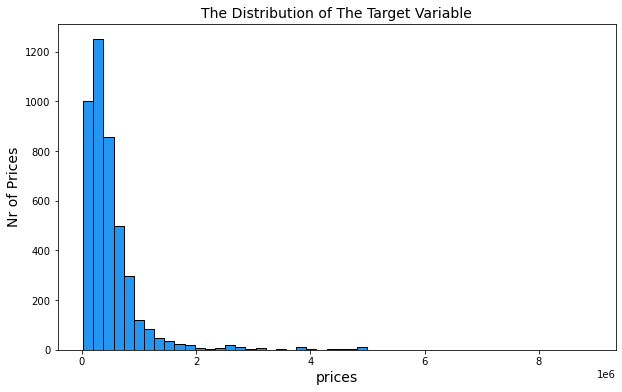

In [21]:
plt.figure(figsize=(10,6))
plt.hist(data['price'], bins=50,ec='black', color='#2196f3') 
plt.xlabel('prices', fontsize=14)
plt.ylabel('Nr of Prices', fontsize=14)
plt.title("The Distribution of The Target Variable", fontsize=14)
plt.show() 

* We have a big problem about outliers. 
* If we leave this as above, this situation manipulates our stats. 
* So, we should get rid of this. 

* Coming cells, we will be looking for BOX PLOT and IQR.

In [22]:
data['price'].skew()

4.892021472306356

In [23]:
data["price"].min()

20000

In [24]:
data["price"].max()

8900000

In [25]:
data['price'].mean() 

504127.3117511521

# Box Plot

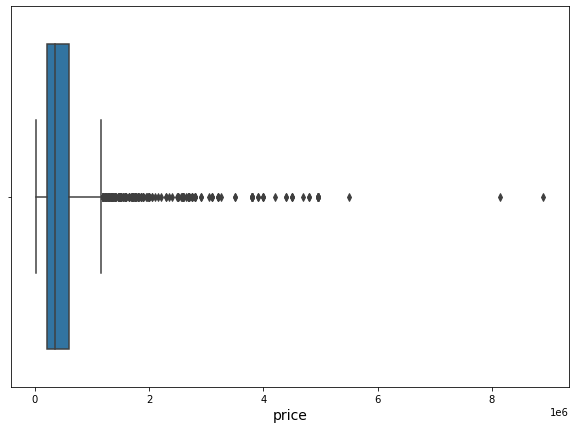

In [26]:
plt.figure(figsize=(10,7))

sns.boxplot(x=data['price'])
plt.xlabel("price",fontsize=14)
plt.show()

In [27]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

391250.25


In [28]:
res = (data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR))
print(res[res.values == True].count(), "outliers")

271 outliers


* In this case, we have two way we can try 
* a. Data Transformation 
* b. Removing Outliers

## a. Data Transformation 

In [29]:
log_prices = np.log(data['price'])
data_log_prices = data.drop(['price'], axis=1)
data_log_prices['price'] = log_prices

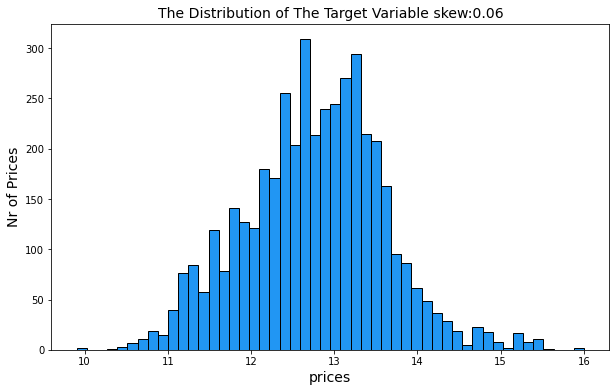

In [30]:
plt.figure(figsize=(10,6))
plt.hist(data_log_prices['price'], bins=50,ec='black', color='#2196f3') 
plt.xlabel('prices', fontsize=14)
plt.ylabel('Nr of Prices', fontsize=14)
plt.title(f"The Distribution of The Target Variable skew:{str(round(data_log_prices['price'].skew(),3))}", fontsize=14)
plt.show() 

## b. Removing Outliers 

In [31]:
data.iloc[12,:] # example of an outlier

year               2018
km_driven         25000
fuel                  0
seller_type           1
owner                 0
transmission          1
price           1650000
Name: 12, dtype: int64

In [32]:
out_idx = res[res.values == True].index
data_rem_out = data.drop(index=out_idx)
data_rem_out.shape

(4069, 7)

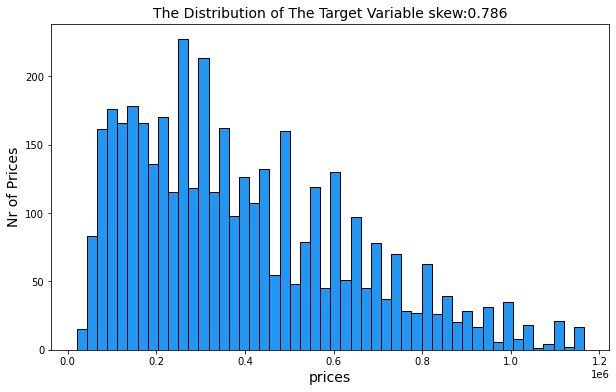

In [33]:
plt.figure(figsize=(10,6))
plt.hist(data_rem_out['price'], bins=50,ec='black', color='#2196f3') 
plt.xlabel('prices', fontsize=14)
plt.ylabel('Nr of Prices', fontsize=14)
plt.title(f"The Distribution of The Target Variable skew:{str(round(data_rem_out['price'].skew(),3))}", fontsize=14)
plt.show() 

* We have a lot more normal disribution with log prices, 
* We are going to use like this. 

In [34]:
data = data_log_prices

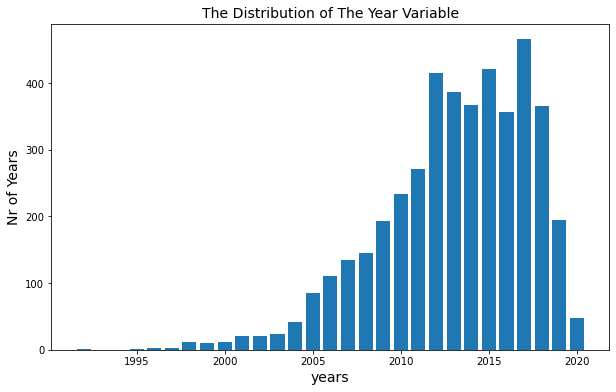

In [35]:
plt.figure(figsize=(10,6))
freq = data['year'].value_counts()
plt.bar(x=freq.index, height=freq.values)
plt.xlabel('years', fontsize=14)
plt.ylabel('Nr of Years', fontsize=14)
plt.title(f"The Distribution of The Year Variable", fontsize=14)
plt.show()

In [36]:
data['year'].min() 

1992

In [37]:
data['year'].max() 

2020

In [38]:
data.loc[data['year'] < 2000, 'price'] .mean() 

11.342625858594324

In [39]:
data.loc[data['year'] > 2000, 'price'] .mean() 

12.778202028385524

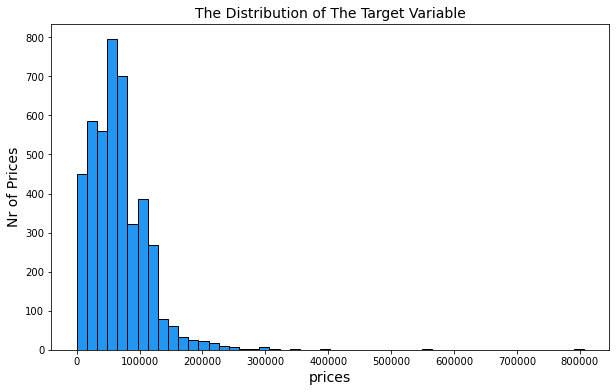

In [40]:
plt.figure(figsize=(10,6))
plt.hist(data['km_driven'], bins=50,ec='black', color='#2196f3') 
plt.xlabel('prices', fontsize=14)
plt.ylabel('Nr of Prices', fontsize=14)
plt.title("The Distribution of The Target Variable", fontsize=14)
plt.show() 

In [41]:
data['km_driven'].mean() 

66215.77741935484

In [42]:
data['km_driven'].min() 

1

In [43]:
data['km_driven'].max() 

806599

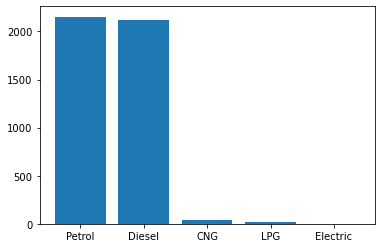

In [44]:
plt.bar(x=fuel_unique_names.index, height=data['fuel'].value_counts())
plt.show() 

In [45]:
round(data.describe())

,year,km_driven,fuel,seller_type,owner,transmission,price
count,4340.0,4340.0,4340.0,4340.0,4340.0,4340.0,4340.0
mean,2013.0,66216.0,1.0,0.0,1.0,0.0,13.0
std,4.0,46644.0,1.0,0.0,1.0,0.0,1.0
min,1992.0,1.0,0.0,0.0,0.0,0.0,10.0
25%,2011.0,35000.0,0.0,0.0,0.0,0.0,12.0
50%,2014.0,60000.0,1.0,0.0,0.0,0.0,13.0
75%,2016.0,90000.0,1.0,1.0,1.0,0.0,13.0
max,2020.0,806599.0,4.0,2.0,4.0,1.0,16.0


# Correlation 

* We care about two things, 
    a. Strength 
    b. Direction 
* Actually, We want the correlation that is not close to zero with target variable. 
* Also, the correlation among features shouldn't be too high, if it is, we can suspect "MULTICOLLINEARRITY"

* For now, let's begin with <b>Correlation</b>

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [46]:
data.corr() # Pearson Correlation Coefficients

,year,km_driven,fuel,seller_type,owner,transmission,price
year,1.000000,-0.419688,0.090388,0.182458,-0.392591,0.143800,0.695723
km_driven,-0.419688,1.000000,0.274760,-0.187131,0.275937,-0.120226,-0.242700
fuel,0.090388,0.274760,1.000000,0.011358,0.015234,0.027507,0.304897
seller_type,0.182458,-0.187131,0.011358,1.000000,-0.209072,0.200191,0.294493
owner,-0.392591,0.275937,0.015234,-0.209072,1.000000,-0.075035,-0.310024
transmission,0.143800,-0.120226,0.027507,0.200191,-0.075035,1.000000,0.413513
price,0.695723,-0.242700,0.304897,0.294493,-0.310024,0.413513,1.000000


In [47]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

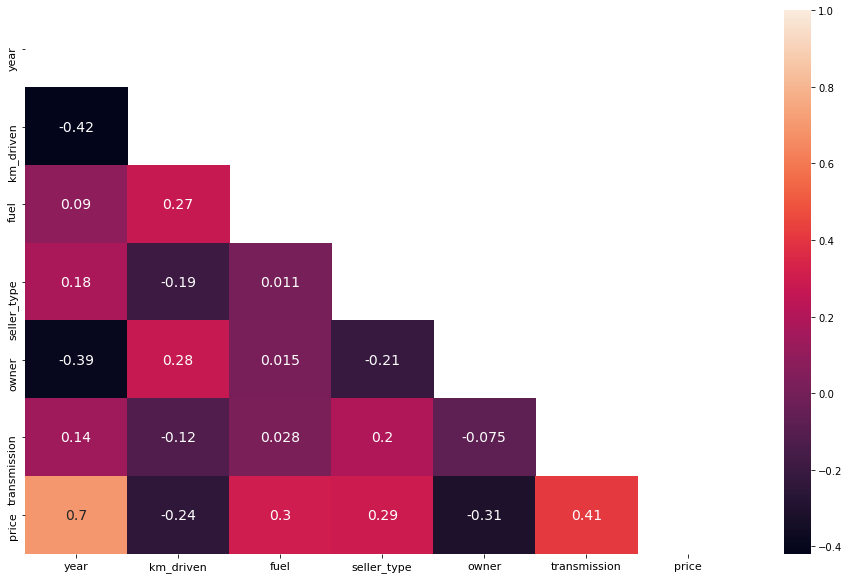

In [48]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

* We should take the note, now we are using Pearson Correlation.
* Pearson's correlation coefficient is a measure of the strength of the association between the two variables but it works with countinuos variables.

* So, you can see above, we have six features but all of them are not countinuos. 
* There are just two countinuos features "year" and "km_driven". So that we can analyze them with Pearson correlation, actually default in pandas corr function. 

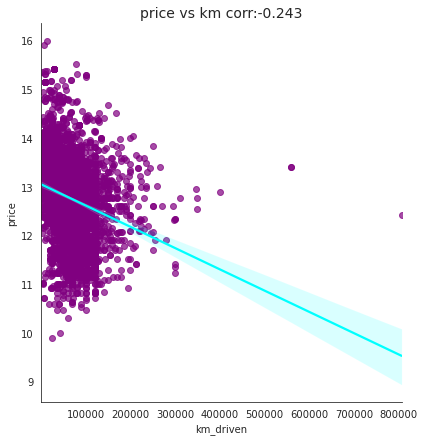

In [49]:
cor = round(data['price'].corr(data['km_driven']),3) 
sns.lmplot(x="km_driven", y="price", data=data, height=6, 
           line_kws={'color': 'cyan'}, scatter_kws={'color': 'purple', 'alpha': 0.7})
plt.title(f'price vs km corr:{cor}', fontsize=14)
plt.show() 

* km_driven feature has a low corr with target. 
* We have to fix this. 
* We can miss a explanatory variable or something alse, 
* let's have a look at distribution of the km_driven

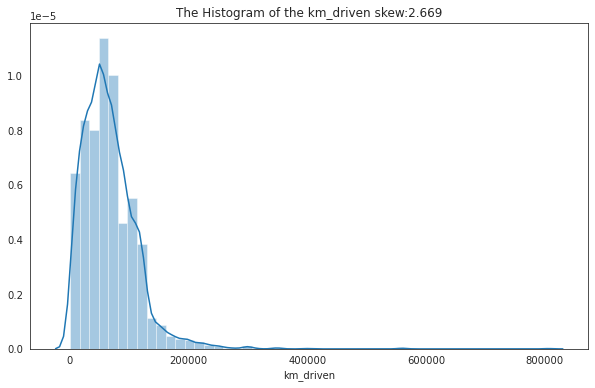

In [50]:
plt.figure(figsize=(10,6))
sns.distplot(data['km_driven'])
plt.title(f"The Histogram of the km_driven skew:{round(data['km_driven'].skew(),3)}")
plt.show()

In [51]:
data['price'].corr(np.log(data['km_driven']))

-0.29384308810589904

In [52]:
km_log = np.log(data['km_driven'])
data['km_driven'] = km_log
data.head() 

,year,km_driven,fuel,seller_type,owner,transmission,price
0,2007,11.156251,0,0,0,0,11.002100
1,2007,10.819778,0,0,0,0,11.813030
2,2012,11.512925,1,0,0,0,13.304685
3,2017,10.736397,0,0,0,0,12.429216
4,2014,11.856515,1,0,1,0,13.017003


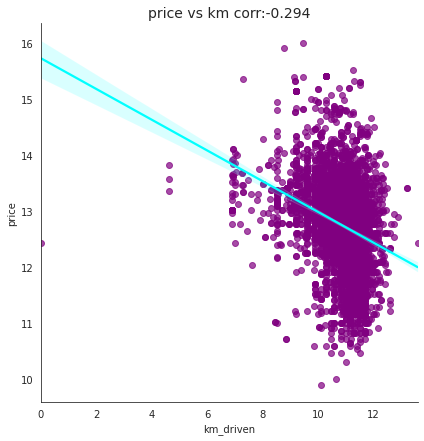

In [53]:
cor = round(data['price'].corr(data['km_driven']),3) 
sns.lmplot(x="km_driven", y="price", data=data, height=6, 
           line_kws={'color': 'cyan'}, scatter_kws={'color': 'purple', 'alpha': 0.7})
plt.title(f'price vs km corr:{cor}', fontsize=14)
plt.show() 

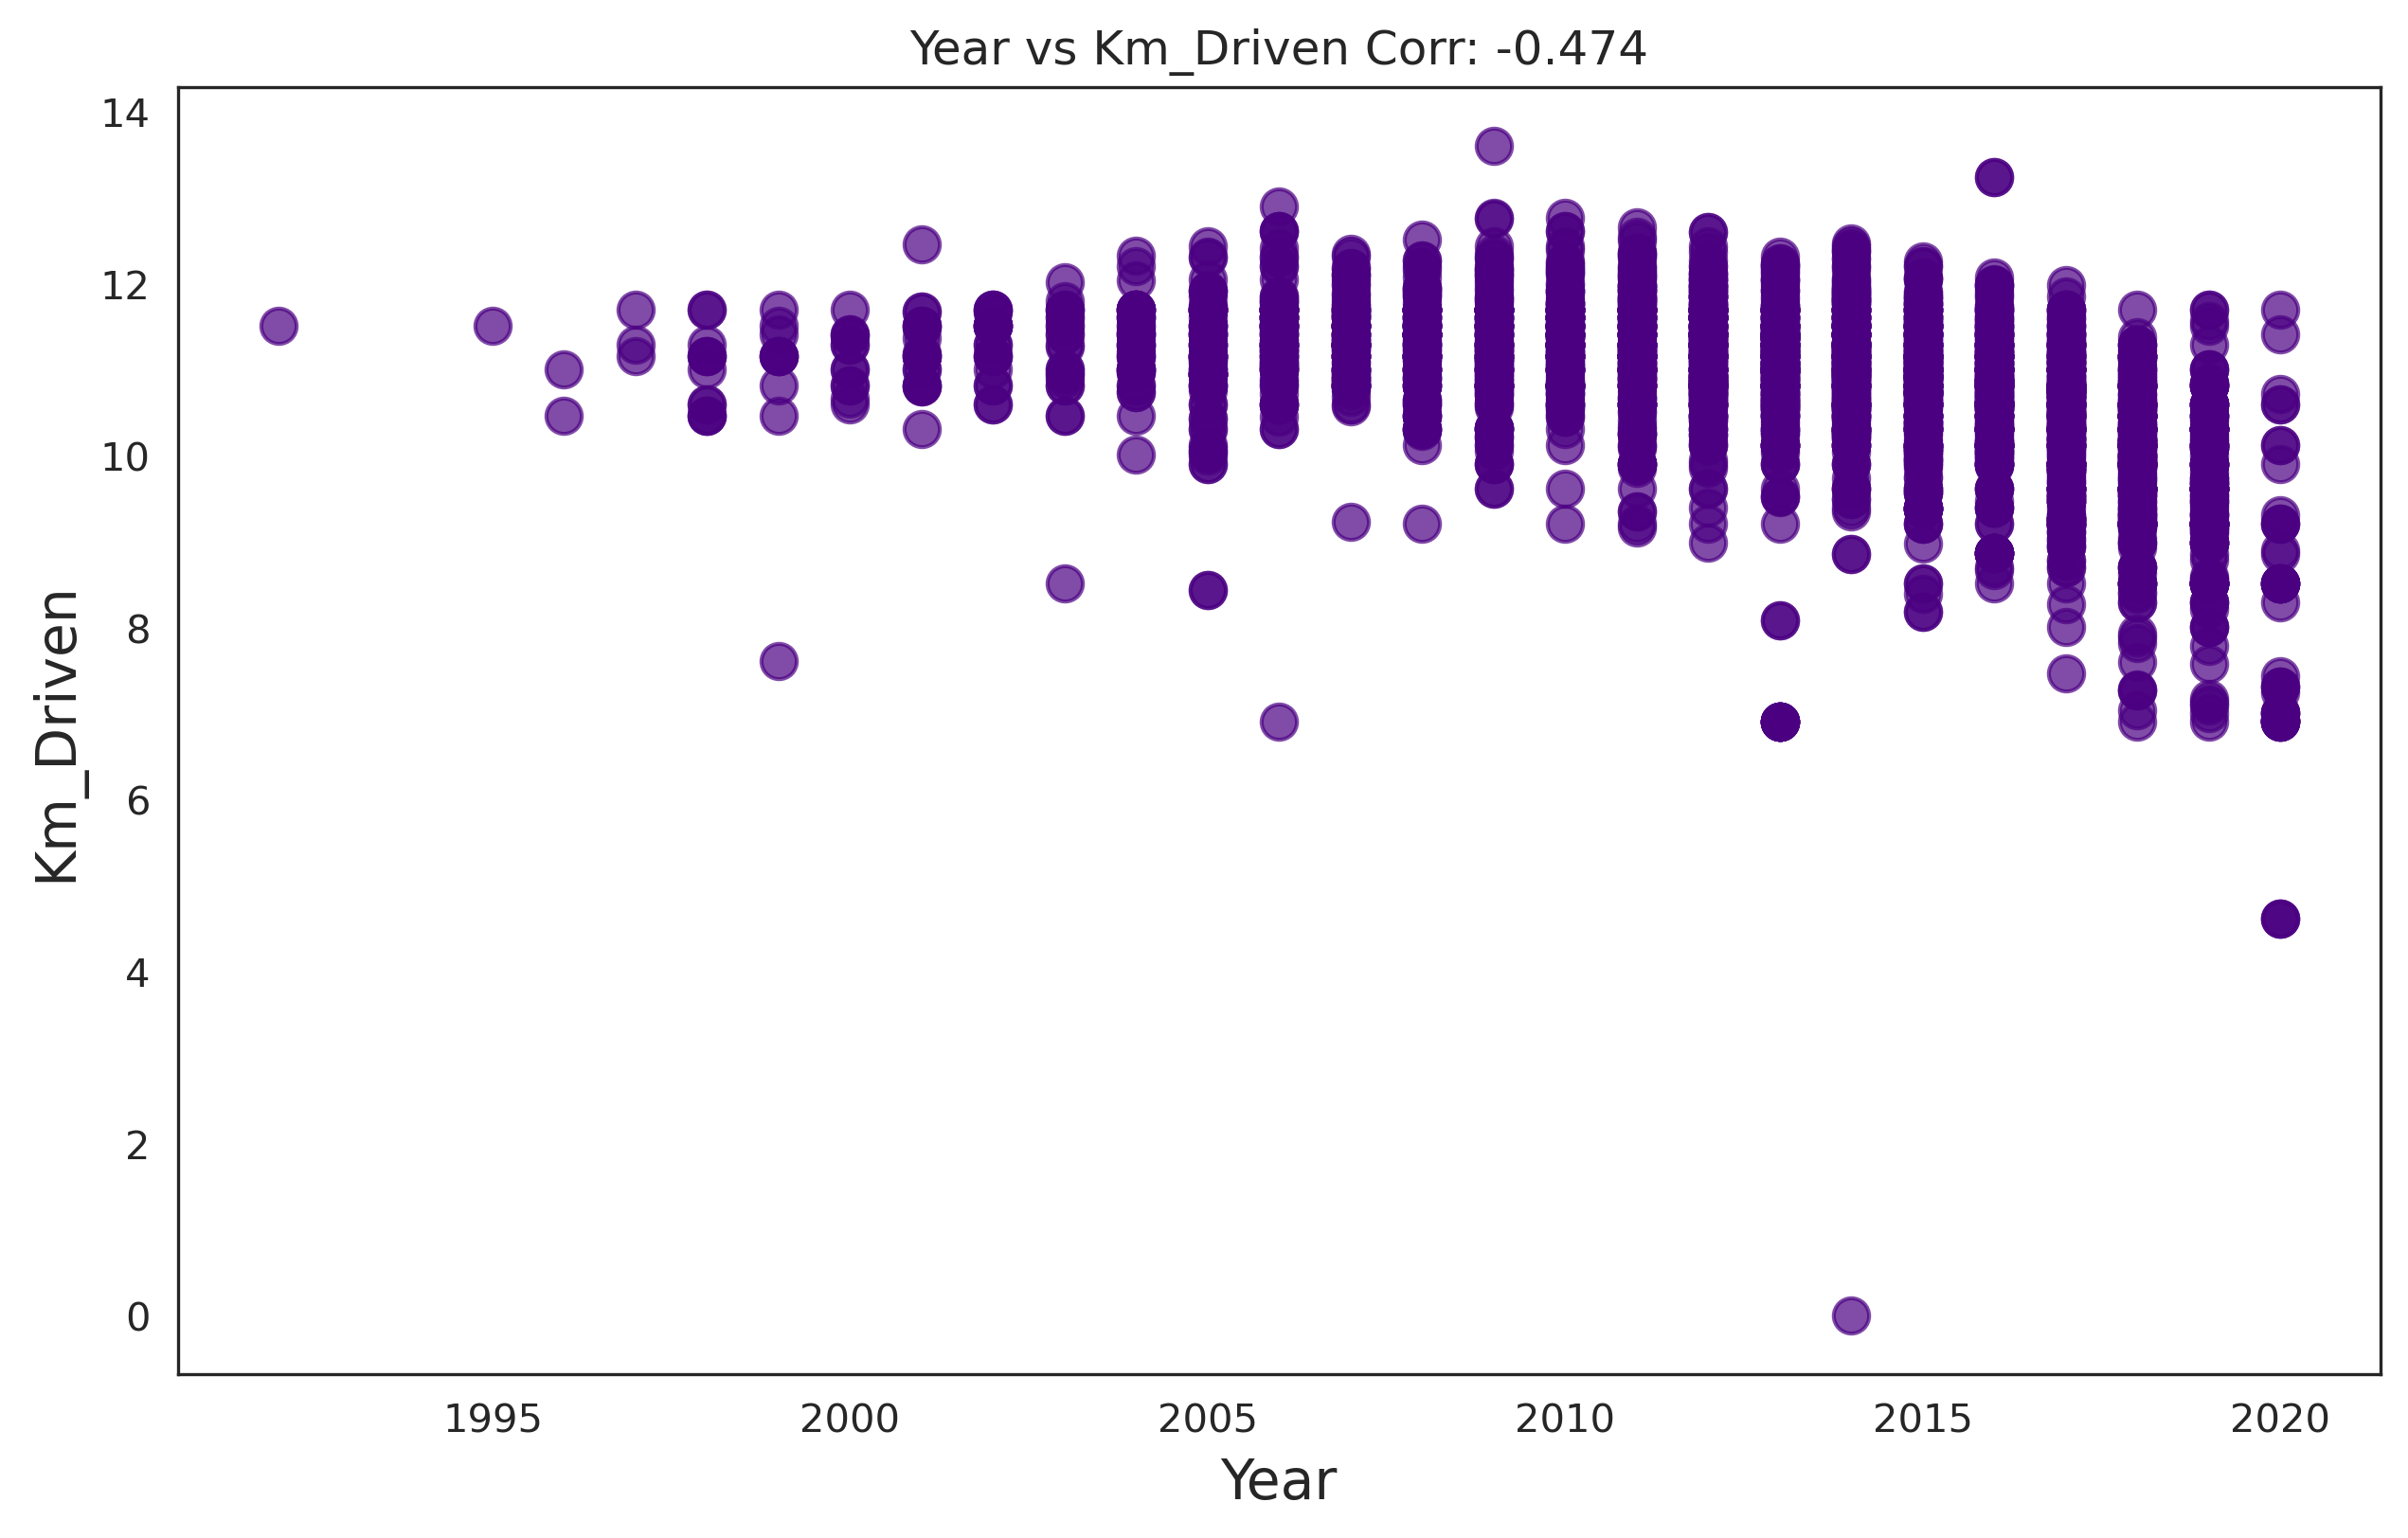

In [54]:
plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(data['year'], data['km_driven'], color='indigo', s=80, alpha=0.7)
plt.title(f"Year vs Km_Driven Corr: {round(data['year'].corr(data['km_driven']),3)}")
plt.xlabel('Year', fontsize=14)
plt.ylabel('Km_Driven', fontsize=14)          
plt.show() 

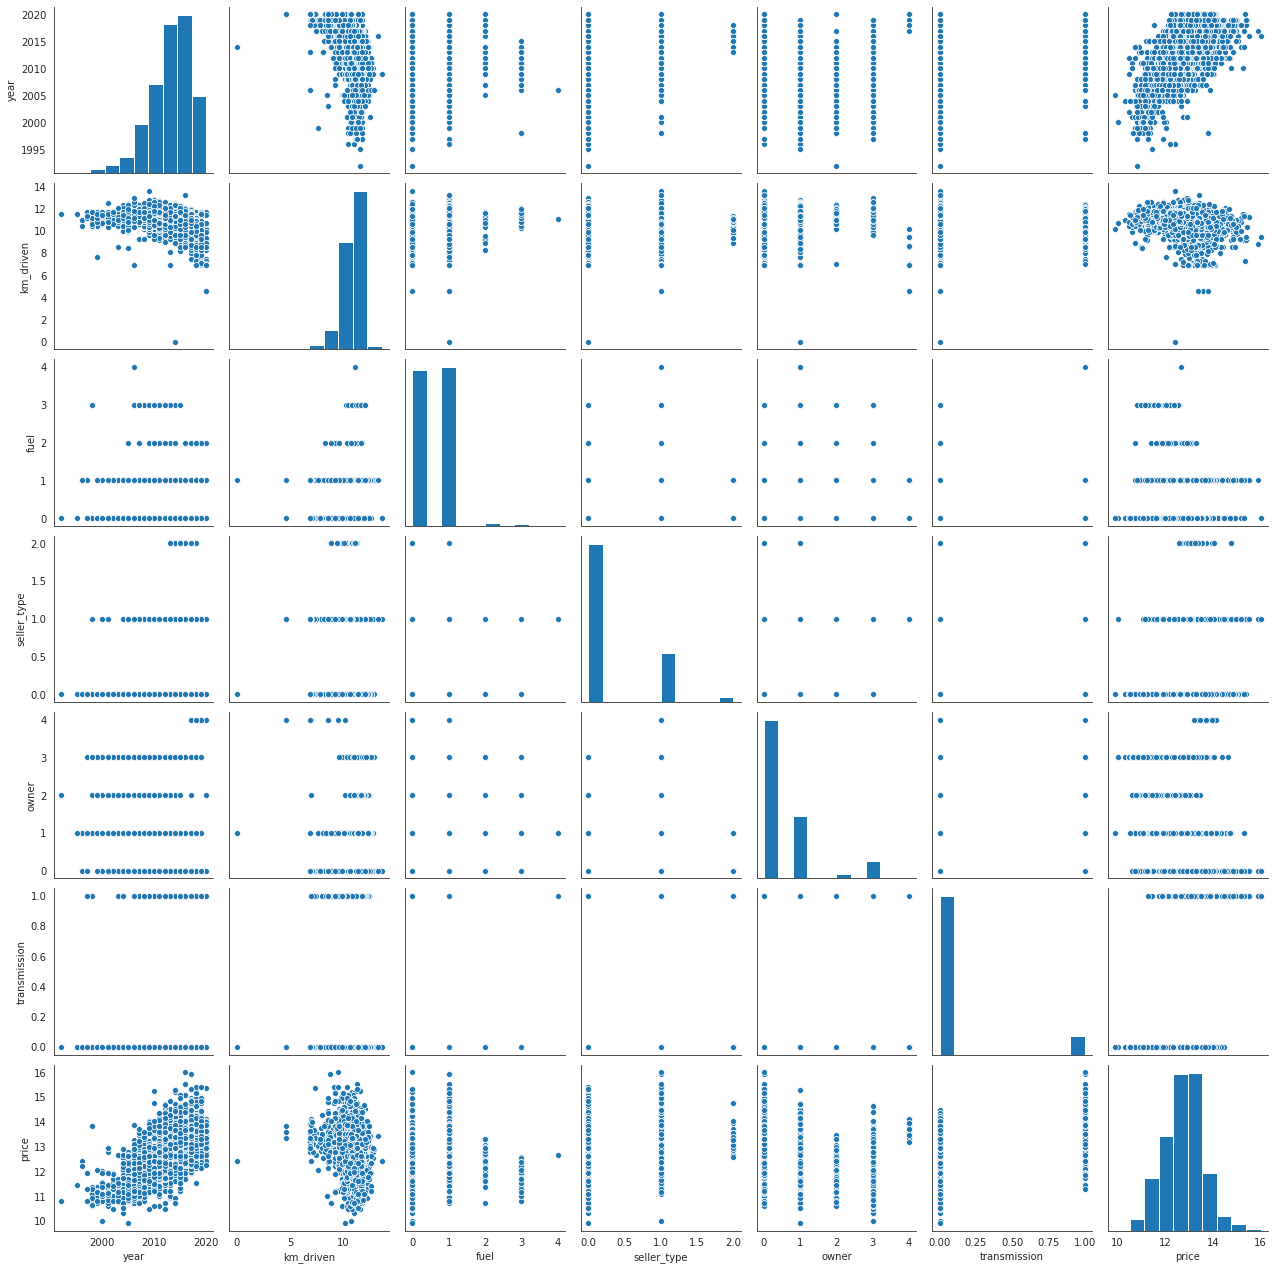

CPU times: user 13.6 s, sys: 100 ms, total: 13.7 s
Wall time: 13.7 s


In [55]:
%%time

sns.pairplot(data)
plt.show()

# Training & Test Dataset Split

In [56]:
log_target = data['price']
features = data.drop(['price'], axis=1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(features, log_target, test_size=0.2)

# Multivariable Regression 

In [58]:
# Model using log price and log km_driven 
regr = LinearRegression() 
model_log_price_km = regr.fit(X_train, y_train)

log_price_log_km = regr.score(X_train, y_train)


print('Intercept is', round(regr.intercept_,3))
print('R-squared for training set is', regr.score(X_train, y_train))
print('R-squared for testing set is', regr.score(X_test, y_test))

pd.DataFrame(regr.coef_, columns=['coef'], index=features.columns)

Intercept is -225.763
R-squared for training set is 0.6504148440208883
R-squared for testing set is 0.676151314451586


,coef
year,0.118387
km_driven,-0.010015
fuel,0.359539
seller_type,0.191494
owner,-0.033127
transmission,0.831589


In [59]:
target = np.e**data['price']
features = data.drop(['price'], axis=1)
features['km_driven'] = np.e**data['km_driven']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [61]:
# Model using normal price and normal km_driven 
regr = LinearRegression() 
regr.fit(X_train, y_train)

norm_price_norm_km = regr.score(X_train, y_train)

print('Intercept is', round(regr.intercept_,3))
print('R-squared for training set is', regr.score(X_train, y_train))
print('R-squared for testing set is', regr.score(X_test, y_test))

pd.DataFrame(regr.coef_, columns=['coef'], index=features.columns)

Intercept is -81979132.594
R-squared for training set is 0.45977637328588905
R-squared for testing set is 0.3814002080415999


,coef
year,40879.135841
km_driven,-0.508035
fuel,212867.049984
seller_type,97033.746873
owner,-10623.427419
transmission,845473.037143


In [62]:
# Model using log price and norm km_driven 

target = data['price']
features = data.drop(['price'], axis=1)
features['km_driven'] = np.e**data['km_driven']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)


regr = LinearRegression() 
regr.fit(X_train, y_train)

log_price_norm_km = regr.score(X_train, y_train)

print('Intercept is', round(regr.intercept_,3))
print('R-squared for training set is', regr.score(X_train, y_train))
print('R-squared for testing set is', regr.score(X_test, y_test))

pd.DataFrame(regr.coef_, columns=['coef'], index=features.columns)

Intercept is -233.322
R-squared for training set is 0.6597717160295935
R-squared for testing set is 0.6397085640768727


,coef
year,1.220711e-01
km_driven,4.932875e-07
fuel,3.511465e-01
seller_type,2.087342e-01
owner,-3.122075e-02
transmission,7.882616e-01


# Model Evaluation 

  ### a. R-Squared

In [63]:
arr = np.asanyarray([log_price_log_km, log_price_norm_km, norm_price_norm_km])

pd.DataFrame(arr, columns=['R-Squared'], index=['LOG PRICE AND LOG KM', 'LOG PRICE AND NORMAL KM', 'NORMAL PRICE AND NORMAL KM'])

,R-Squared
LOG PRICE AND LOG KM,0.650415
LOG PRICE AND NORMAL KM,0.659772
NORMAL PRICE AND NORMAL KM,0.459776


## b. P-Value

In [64]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const) 
results = model.fit() 
round(results.pvalues, 3)

const           0.000
year            0.000
km_driven       0.034
fuel            0.000
seller_type     0.000
owner           0.003
transmission    0.000
dtype: float64

In [65]:
log_km_x_train = X_train
log_km_x_train['km_driven'] = np.log(X_train['km_driven'])
X_incl_const_log_km = sm.add_constant(log_km_x_train)
model = sm.OLS(y_train, X_incl_const_log_km) 
results = model.fit() 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
round(results.pvalues, 3)

const           0.000
year            0.000
km_driven       0.514
fuel            0.000
seller_type     0.000
owner           0.006
transmission    0.000
dtype: float64

* You can see abowe, km_driven has a p_value that is equal to 0.049. Because of this, It doesn't look significance statistically. 
* We tried data transformation for it. We used log function, but in this case it increased.

# c. Multicollinearity

* Actually, We didn't suspect multicollinearity because of our correlatin table. 
* If two or more variable were higly related to one another, they wouln't provide unique or independent information for our model. 
* But we're gonna look at it with VIF. 
* VIF(Variation Inflation Factor). 

In [67]:
variance_inflation_factor(exog=np.asanyarray(X_incl_const_log_km), exog_idx=1)

1.5793561041605104

In [68]:
vifs = [variance_inflation_factor(exog=np.asanyarray(X_incl_const_log_km), exog_idx=i) 
        for i in range(len(X_incl_const.columns))]
pd.DataFrame(np.asanyarray(vifs).reshape(1,7),  columns=X_incl_const.columns, index=['VIF'])

,const,year,km_driven,fuel,seller_type,owner,transmission
VIF,377412.409926,1.579356,1.500564,1.142648,1.114043,1.214262,1.066186


# d. Model Simplification & the BIC

In [69]:
# Model using log price and norm km_driven 

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit() 

print("R-squared is", results.rsquared)
print("BIC is", results.bic)

R-squared is 0.6593735925083248
BIC is 4914.0535026953185


In [70]:
# Model using log price without km_driven 

X_incl_const = sm.add_constant(X_train.drop(['km_driven'], axis=1))
model = sm.OLS(y_train, X_incl_const)
results = model.fit() 

print("R-squared is", results.rsquared)
print("BIC is", results.bic)

R-squared is 0.6593317792927623
BIC is 4906.327191958684


# Residual and Residual Plots

* We'll analyze the residual vs predicted values and the dist of the residual. The residual vs predicted shouldn't have any pattern. If you catch any pattern in scatter plot, may be you are missig an explanotory variable, or something else is wrong for your model. 

* And also for a good linear regression model, you should have normally distributed residual. It's important. Because you can see how it is working your model. 

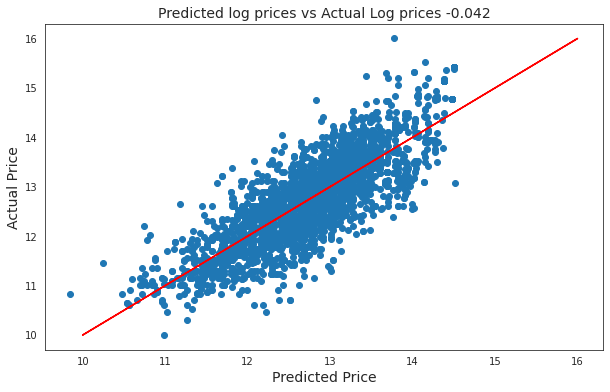

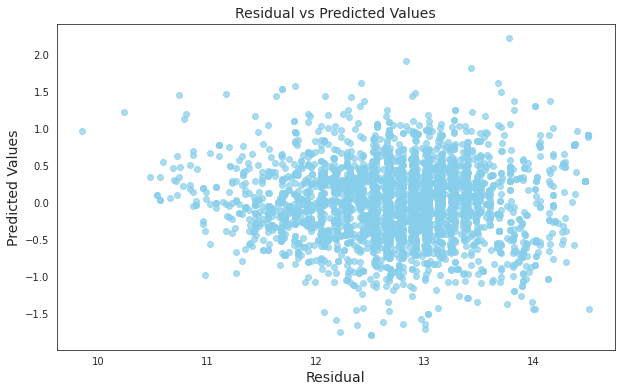

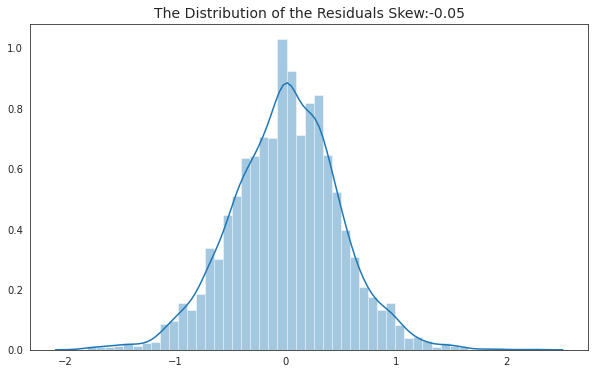

In [71]:
# Predicted log prices vs Actual Log prices 

regr = LinearRegression().fit(X_train, y_train) 

predicted_values = pd.Series(regr.predict(X_train))
corr = np.round(y_train.corr(predicted_values), 3)

plt.figure(figsize=(10,6))

plt.scatter(x=predicted_values, y=y_train)
plt.plot(y_train, y_train, c='red')
plt.title(f"Predicted log prices vs Actual Log prices {corr}", fontsize=14)
plt.xlabel('Predicted Price',fontsize=14)
plt.ylabel('Actual Price', fontsize=14) 


# residual vs predicted values 
plt.figure(figsize=(10,6))
y = np.asanyarray(y_train)
y_hat = np.asanyarray(predicted_values)
resi = y - y_hat

plt.scatter(x=predicted_values, y=resi, c="skyblue",alpha=0.7)
plt.xlabel('Residual', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title("Residual vs Predicted Values", fontsize=14)

plt.figure(figsize=(10,6))
sns.distplot(resi)
plt.title(f'The Distribution of the Residuals Skew:{round(pd.Series(resi).skew(), 2)}', fontsize=14)

plt.show() 

In [72]:
print("R-squared is", regr.score(X_train, y_train))

R-squared is 0.6593735925083257
